<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/master/04-spin-boson-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/04-spin-boson-model.ipynb" target="_parent"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# 5 - Highly excited boson field

> TODO: Description

In [329]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import gif
import numpy as np
import pandas as pd
from qutip import *
import warnings
warnings.filterwarnings('ignore')
from itertools import product
import os

# Functions created in 04 tutorial

import libs.helper_05_tutorial

If we are only interested in high boson numbers and don't want to incur the cost of simulation the low ones as well then we need to modify `make_operators` from the last tutorial.

In [330]:

def make_operators(max_bosons, min_bosons, parity=0):
    
    num_boson_states = max_bosons - min_bosons
    
    a       = tensor(destroy(num_boson_states+1 ,min_bosons), qeye(2))   # tensorised boson destruction operator
    number  = tensor(num(num_boson_states+1, min_bosons), qeye(2))       # tensorised boson number operator
    sx      = tensor(qeye(num_boson_states+1), sigmax())                 # tensorised sigma_x operator
    sz      = tensor(qeye(num_boson_states+1),sigmaz())                  # tensorised sigma_z operator
    
    two_state     =  1/2*sz                                             # two state system energy operator
    bosons       =  (number+0.5)                                        # boson energy operator
    interaction  = (a.dag() + a) * sx                                   # interaction energy operator      
    
    P = sz*(1j*np.pi*number).expm()                                     # parity operator 
    
    # map from QuTiP number states to |n,±> states
    possible_ns = range(min_bosons, max_bosons+1)
    possible_ms = ["+","-"]
    nm_list = [(n,m) for (n,m) in product(possible_ns, possible_ms)]

    
    # only do parity extraction if a valid parity is being used
    if (parity==1) | (parity==-1):
        p           = np.where(P.diag()==parity)[0]
        
        two_state   = two_state.extract_states(p)
        bosons      = bosons.extract_states(p)
        number      = number.extract_states(p)
        interaction = interaction.extract_states(p)
        nm_list     = [nm_list[i] for i in p]
    
    
    return two_state, bosons, interaction, number, nm_list

We'll start with `min_bosons` = 2400 and go up to `max_bosons` = 2800 and look at even parity.

In [ ]:
two_state, bosons, interaction, number, nm_list = make_operators(2800,2400,1)

df = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, two_state.shape[0])

for i, row in df.iterrows():
    H =  row["$\Delta E$"]*two_state + 1*bosons + 0.2*interaction
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals

We'll only plot the levels that are away from plotting close to energies associated with the max and min boson numbers. This is so that we don't get any boundary effects in the levels. 

We didn't worry about this last time as it would be too much to talk about. But we need to get more serious about it now.

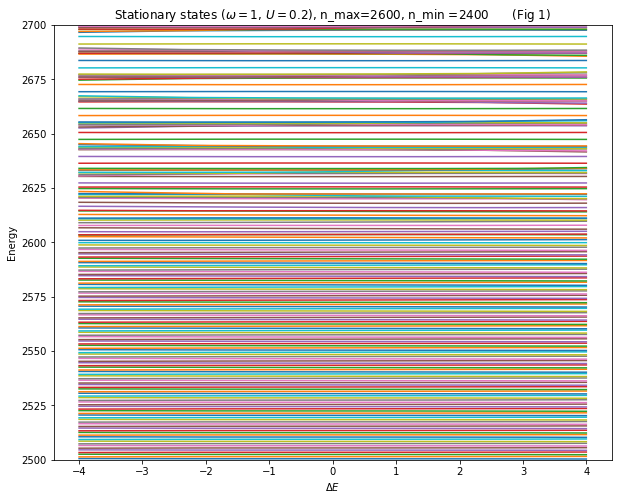

In [324]:
df.plot(x="$\Delta E$",figsize=(10,8),ylim=[2500,2700],legend=False, 
        title=f"Stationary states ($\omega=1$, $U=0.2$), n_max={min_bosons+200}, n_min ={min_bosons}      (Fig 1)");
plt.ylabel("Energy");

Something seems strange - the levels appear to "thin" out as we go up in energy. It's hard to see at this scale so let's create an animation that zooms in and slides up the axis

In [ ]:

@gif.frame
def plot(ymin,ymax):
    df.plot(x="$\Delta E$",figsize=(10,8),ylim=[ymin,ymax],legend=False, 
            title=f"Stationary states ($\omega=1$, $U=0.2$), n_max=2800, n_min =2400");
    plt.ylabel("Energy");

num_frames = int((2675-2525)/1)

frames = []

ylims = np.array([2500,2525])
for i in range(num_frames):
    frame = plot(ylims[0], ylims[1])
    frames.append(frame)
    ylims+=1
gif.save(frames, "./img/level_scan.gif", duration=500)    

In [ ]:
os.rename("./img/level_scan.gif", "./img/level_scan.gif.png")

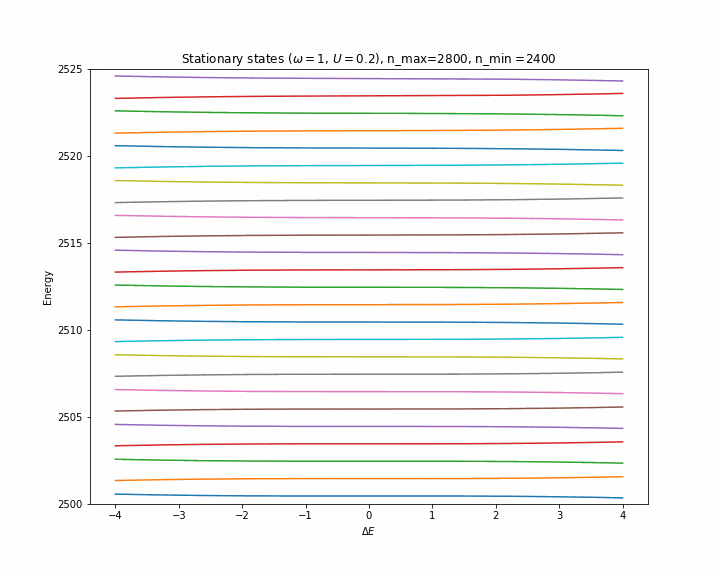

In [325]:
Image(filename="./img/level_scan.gif.png")

I don't understand what is going on in this animation at all.

Let's make a few snap shots of the animation to study more.

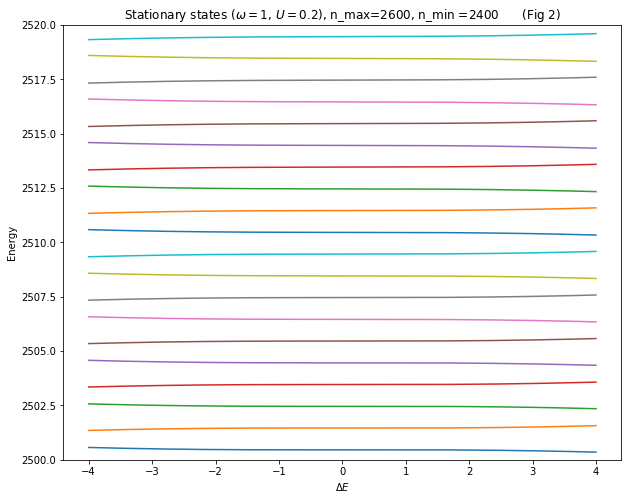

In [275]:
min_bosons = 2400

two_state, bosons, interaction, number, nm_list = make_operators(min_bosons+200,min_bosons,1)

df = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, two_state.shape[0])

for i, row in df.iterrows():
    H =  row["$\Delta E$"]*two_state + 1*bosons + 0.2*interaction
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals
    
df.plot(x="$\Delta E$",figsize=(10,8),ylim=[min_bosons+100,min_bosons+120],legend=False, 
        title=f"Stationary states ($\omega=1$, $U=0.2$), n_max={min_bosons+200}, n_min ={min_bosons}      (Fig 2)");
plt.ylabel("Energy");

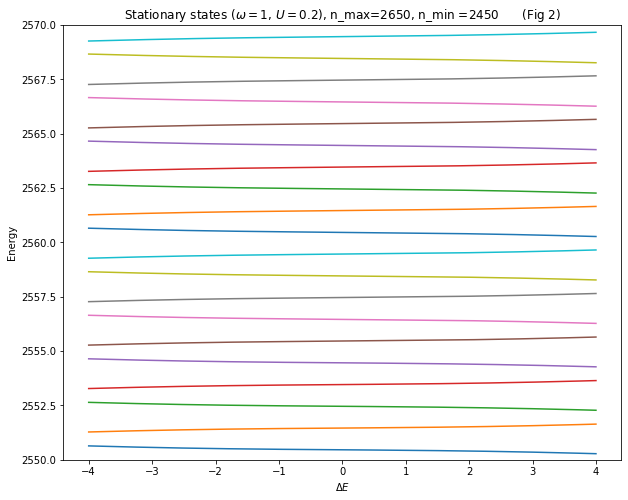

In [278]:
min_bosons = 2450

two_state, bosons, interaction, number, nm_list = make_operators(min_bosons+200,min_bosons,1)

df = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, two_state.shape[0])

for i, row in df.iterrows():
    H =  row["$\Delta E$"]*two_state + 1*bosons + 0.2*interaction
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals
    
df.plot(x="$\Delta E$",figsize=(10,8),ylim=[min_bosons+100,min_bosons+120],legend=False, 
        title=f"Stationary states ($\omega=1$, $U=0.2$), n_max={min_bosons+200}, n_min ={min_bosons}      (Fig 2)");
plt.ylabel("Energy");

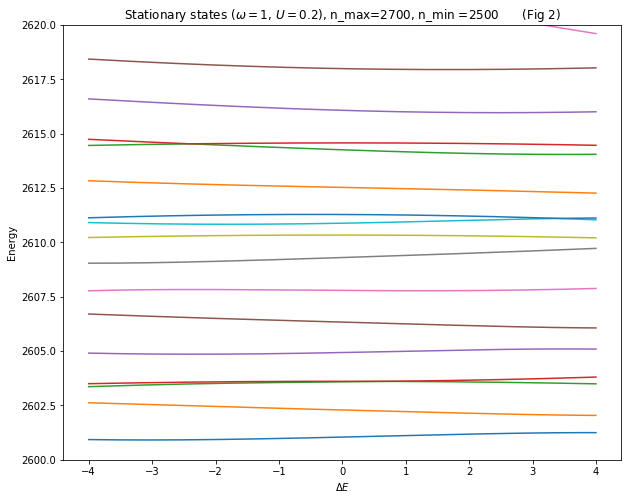

In [276]:
min_bosons = 2500

two_state, bosons, interaction, number, nm_list = make_operators(min_bosons+200,min_bosons,1)

df = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, two_state.shape[0])

for i, row in df.iterrows():
    H =  row["$\Delta E$"]*two_state + 1*bosons + 0.2*interaction
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals
    
df.plot(x="$\Delta E$",figsize=(10,8),ylim=[min_bosons+100,min_bosons+120],legend=False, 
        title=f"Stationary states ($\omega=1$, $U=0.2$), n_max={min_bosons+200}, n_min ={min_bosons}      (Fig 2)");
plt.ylabel("Energy");

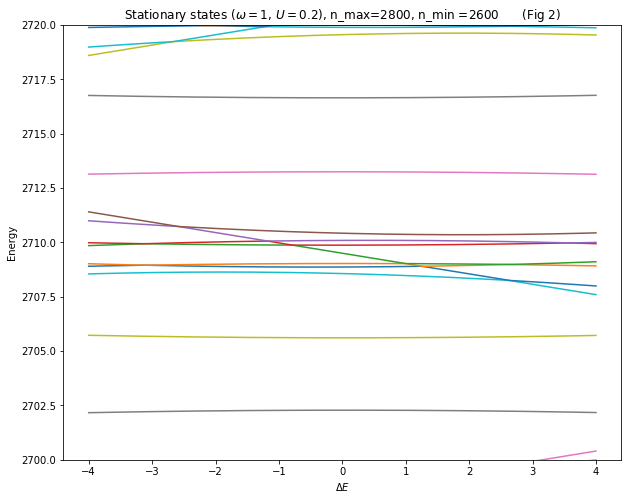

In [277]:
min_bosons = 2600

two_state, bosons, interaction, number, nm_list = make_operators(min_bosons+200,min_bosons,1)

df = make_df_for_energy_scan("$\Delta E$", -4, 4, 201, two_state.shape[0])

for i, row in df.iterrows():
    H =  row["$\Delta E$"]*two_state + 1*bosons + 0.2*interaction
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals
    
df.plot(x="$\Delta E$",figsize=(10,8),ylim=[min_bosons+100,min_bosons+120],legend=False, 
        title=f"Stationary states ($\omega=1$, $U=0.2$), n_max={min_bosons+200}, n_min ={min_bosons}      (Fig 2)");
plt.ylabel("Energy");